# Boosting

Boosting

Different techiques:

     AdaBoost
     
     GradientBoost
     
     XGBoost

Use diabetes for implementing these

Find the best models by hyper parameter tuning

Compare and choose the best

Use that to give inferences.

## AdaBoost

https://www.youtube.com/watch?v=LsK-xG1cLYA&t=614s

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
db=pd.read_csv('diabetes.csv')
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
y=db['Outcome']
X=db.drop(['Outcome'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2, random_state=10)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Building- AdaBoost

In [7]:
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier(random_state=10)

abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=10)

In [9]:
from sklearn.metrics import classification_report

report= classification_report(y_test,abc.predict(X_test))
print('Report:\n',report)

Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.81        95
           1       0.73      0.51      0.60        59

    accuracy                           0.74       154
   macro avg       0.74      0.70      0.70       154
weighted avg       0.74      0.74      0.73       154



In [10]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

abc_gs=GridSearchCV(abc,{'n_estimators':range(25,75),
                        'learning_rate':[0,0.25,0.5,0.75,1]})

In [11]:
abc_gs.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 1250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 114, in fit
    raise ValueError("learning_rate must be grea

GridSearchCV(estimator=AdaBoostClassifier(random_state=10),
             param_grid={'learning_rate': [0, 0.25, 0.5, 0.75, 1],
                         'n_estimators': range(25, 75)})

In [12]:
abc_gs.best_params_

{'learning_rate': 0.25, 'n_estimators': 53}

In [13]:
# Building the best model using these values

ada_best=AdaBoostClassifier(learning_rate=0.25,n_estimators=53,random_state=10)

ada_best.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.25, n_estimators=53, random_state=10)

In [14]:
report=classification_report(y_test,ada_best.predict(X_test))

print('Report:\n',report)

Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84        95
           1       0.83      0.51      0.63        59

    accuracy                           0.77       154
   macro avg       0.79      0.72      0.73       154
weighted avg       0.78      0.77      0.76       154



## Gradient Boost

https://www.youtube.com/watch?v=jxuNLH5dXCs&t=855s

In [15]:
from sklearn.ensemble import GradientBoostingClassifier


In [16]:
gbc=GradientBoostingClassifier(random_state=10)

gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=10)

In [18]:
report=classification_report(y_test,gbc.predict(X_test))

print('Report:\n',report)

Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        95
           1       0.78      0.61      0.69        59

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.78       154



In [19]:
# Hyper parameter tuning

gbc_gs=GridSearchCV(gbc,{'n_estimators':range(75,125),
                        'max_depth':range(1,5),
                        'learning_rate':[0,0.25,.5,.75,1]})

In [20]:
gbc_gs.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1000 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 274, in _check_params
    raise ValueError(
ValueError: learning_rate must be greater than 0 but was 0


GridSearchCV(estimator=GradientBoostingClassifier(random_state=10),
             param_grid={'learning_rate': [0, 0.25, 0.5, 0.75, 1],
                         'max_depth': range(1, 5),
                         'n_estimators': range(75, 125)})

In [21]:
gbc_gs.best_params_

{'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 75}

In [23]:
# Build the best
grad_best=GradientBoostingClassifier(learning_rate=0.25,max_depth=1, n_estimators=75)

In [24]:
grad_best.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.25, max_depth=1, n_estimators=75)

In [25]:
report=classification_report(y_test,grad_best.predict(X_test))

print('Report:\n',report)

Report:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82        95
           1       0.78      0.49      0.60        59

    accuracy                           0.75       154
   macro avg       0.76      0.70      0.71       154
weighted avg       0.76      0.75      0.74       154



## XGBoost


In [26]:
from xgboost import XGBClassifier

/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [27]:
conda install -c conda-forge xgboost

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [28]:
xg=XGBClassifier()
xg.fit(X_train,y_train)

[13:10:53] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
report=classification_report(y_test,xg.predict(X_test))
print('Report:\n',report)

Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.76        95
           1       0.62      0.58      0.60        59

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.70      0.70       154



In [30]:
# Perform the hyper parameter tuning

# Form the best XGBoost model

## Compare the results

In [31]:
# The best result offerd by gbc

gbc.feature_importances_

array([0.04102228, 0.41813537, 0.04903082, 0.02484091, 0.04675064,
       0.16272107, 0.11241005, 0.14508886])

In [32]:
df=pd.DataFrame({'Feature':X.columns,
                'Imp':gbc.feature_importances_})
df

,Feature,Imp
0,Pregnancies,0.041022
1,Glucose,0.418135
2,BloodPressure,0.049031
3,SkinThickness,0.024841
4,Insulin,0.046751
5,BMI,0.162721
6,DiabetesPedigreeFunction,0.112410
7,Age,0.145089


In [33]:
df=df.sort_values(['Imp'],ascending=False)
df

,Feature,Imp
1,Glucose,0.418135
5,BMI,0.162721
7,Age,0.145089
6,DiabetesPedigreeFunction,0.112410
2,BloodPressure,0.049031
4,Insulin,0.046751
0,Pregnancies,0.041022
3,SkinThickness,0.024841


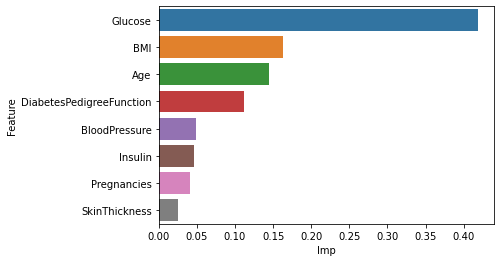

In [34]:
sns.barplot(x=df['Imp'],y=df['Feature'],data=df);